<a href="https://colab.research.google.com/github/AbhilashIngale/EVA-Projects/blob/master/Session_4/Session4_First_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4 : Train MNIST  with a custom Neural Network achieving 99.4% accuracy ( keeping parameter count below 15k )

#  Iteration 1
## AIM :  In  this iteration, the aim is to get to the parameter count well-within the range and evaluate the network for a small batch size for 20 epochs.
## Instead of targeting to achieve the required test accuracy in this iteration, we would just be evaluating if the accuracy is steadily increasing or settling by the end of 20th epoch.


##Import Libraries and modules##

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Import all the dependancies and packages required
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Import the MNIST dataset from keras
from keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets

In [0]:
# Doing the train-test split on the MNIST dataset. Default split ratio (test to train ) is : 1:6
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


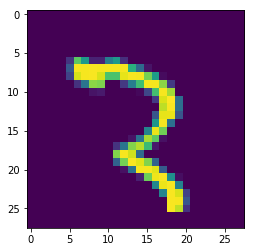

In [5]:
# Visualizing one of the images from the training set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[500])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Converting the intensity range from 0-255 to 0-1 . This is done basically to avoid high computations and preserve system memory.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Print the true labels in the training set.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Print the class matrix of the training set. Here, the true label is the one where '1' occurs for each training point.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Network Architecture : Iteration 1- Vanilla Network

In [0]:
# Importing Activation function 
from keras.layers import Activation
   
############################ START #############################################

model = Sequential()
 
model.add(Convolution2D(12, 3, 3,activation='relu', input_shape=(28,28,1))) #26    
model.add(Convolution2D(24, 3, 3,activation='relu')) #24                            

model.add(Convolution2D(12, 1, 1, activation='relu')) #24                            
model.add(MaxPooling2D(pool_size=(2, 2))) #12                                      

model.add(Convolution2D(12, 3, 3, activation='relu')) # 10                           

model.add(Convolution2D(18, 3, 3, activation='relu')) # 8                          

model.add(Convolution2D(24, 3, 3, activation='relu')) # 6                         

model.add(Convolution2D(10, 1, 1, activation='relu')) # 6                                  
model.add(MaxPooling2D(pool_size=(2, 2)))  # 3                                    
                                                       
model.add(Convolution2D(10, 3, 3, activation= None )) #1                            

model.add(Flatten())
model.add(Activation('softmax'))

############################## END #############################################

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/d

In [0]:
# Shows the image shape after each convolution and the parameter count. Also, shows the trainable and non-trainable parameters. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 24)        2616      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 12)        300       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 10, 10, 12)        1308      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 8, 8, 18)          1962      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 6, 6, 24)          3912      
__________

In [0]:
# Compile the model: Specify loss function , optimizer e.g. SGD , adam etc.(in optimizer set learning rate which is a hyper-parameter)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# FIT 
model.fit(X_train, Y_train, batch_size=20, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 22s 366us/step - loss: 0.2323 - acc: 0.9278
Epoch 2/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0792 - acc: 0.9753
Epoch 3/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0580 - acc: 0.9819
Epoch 4/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.0486 - acc: 0.9843
Epoch 5/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0422 - acc: 0.9871
Epoch 6/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.0390 - acc: 0.9876
Epoch 7/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.0335 - acc: 0.9891
Epoch 8/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.0305 - acc: 0.9901
Epoch 9/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0296 - acc: 0.9905
Epoch 10/20
60000/60000 [==============================] - 19s 321us/step - loss: 

In [0]:
# Making predictions on the test set and storing the result y_pred
y_pred = model.predict(X_test)

In [0]:
# Evaluates the metrics i.e. Loss and Accuracy on the test set
score = model.evaluate(X_test, Y_test, verbose=0)
# Printing the metrics evaluated above
print(score)

[0.03526806984773502, 0.9901]


## Observation
### As we can see, the model architecture has a lesser parameter count now and we would not be working on changing the number of parameters. Also, we have already started to reach very close to the desired test accuracy.

In [0]:
# print the predicted class matrix and true test labels.
print(y_pred[:9])
print(y_test[:9])

[[1.31389130e-16 1.48945540e-13 4.99052248e-06 6.33824513e-08
  5.82705339e-14 2.63873972e-15 2.74861038e-23 9.99994993e-01
  1.68056419e-11 2.15616254e-08]
 [6.05314696e-08 1.21700708e-07 9.99999523e-01 2.08961841e-12
  7.14140214e-08 1.41766275e-12 1.44740270e-07 7.67749918e-14
  1.43396753e-10 8.98067102e-13]
 [1.91811581e-10 9.99996543e-01 5.97800476e-10 4.48272530e-11
  1.25790356e-08 1.48834767e-09 3.08686604e-10 3.38686300e-06
  2.81205637e-09 2.38581821e-10]
 [9.99999762e-01 7.18704082e-20 1.03585494e-10 5.09534645e-12
  6.21568701e-14 2.07460837e-11 2.35638609e-07 8.67529874e-16
  3.01699927e-08 2.47757065e-10]
 [1.18515328e-16 2.33428242e-11 2.66843020e-10 1.15359071e-16
  9.99996662e-01 1.69293299e-16 1.40632601e-12 3.55199030e-11
  1.39765866e-09 3.35715276e-06]
 [5.55389170e-14 9.99997973e-01 3.45013323e-11 1.41774982e-12
  2.99277367e-08 9.36279596e-11 1.48818273e-12 1.99573810e-06
  1.67007977e-10 1.57093738e-09]
 [9.09935647e-27 4.08409057e-10 5.07098183e-12 9.07663036e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
################# CODE TO VISUALIZE FEATURE MAPS ###############################
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_65'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored